In [3]:
import numpy as np 
import emcee
import random
import h5py
from sunpy.coordinates.sun import carrington_rotation_time
from model_chain import run_chain_of_models_mcmc_without_pfss, get_ace_date
import astropy.units as u
from scipy.stats import pearsonr
import os
import scipy
import sunpy

In [24]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

# Ensemble forecasting for CR2052: *uncertainty propagation*

get MCMC samples and draw a few random realizations

In [5]:
CR = "2053"
reader = emcee.backends.HDFBackend("MCMC_results/MCMC_CR" + str(CR) + ".h5")

nburnin = 1000
samples_flatten  = reader.get_chain(flat=True, discard=nburnin)

In [6]:
n_samples, n_params = np.shape(samples_flatten)
print("total number of MCMC samples = ", n_samples)
print("number of unknown parameters = ", n_params)

total number of MCMC samples =  4750000
number of unknown parameters =  5


In [7]:
n_ensemble = 5000

chosen_samples = np.zeros(n_ensemble, dtype=int)

for jj in range(n_ensemble):
    chosen_samples[jj] = random.randint(0, n_samples)

In [8]:
dir_name = os.getcwd() + "/Ensemble_analysis/ensemble_results/CR" + str(CR) + "/"
print("directory = ", dir_name)

directory =  /Users/oissan/PycharmProjects/Parameter_Estimation_Solar_Wind/Ensemble_analysis/ensemble_results/CR2053/


In [9]:
# save samples
np.save(dir_name + "samples_id.npy", chosen_samples)

In [10]:
# read samples
chosen_samples = np.load(dir_name + "samples_id.npy")

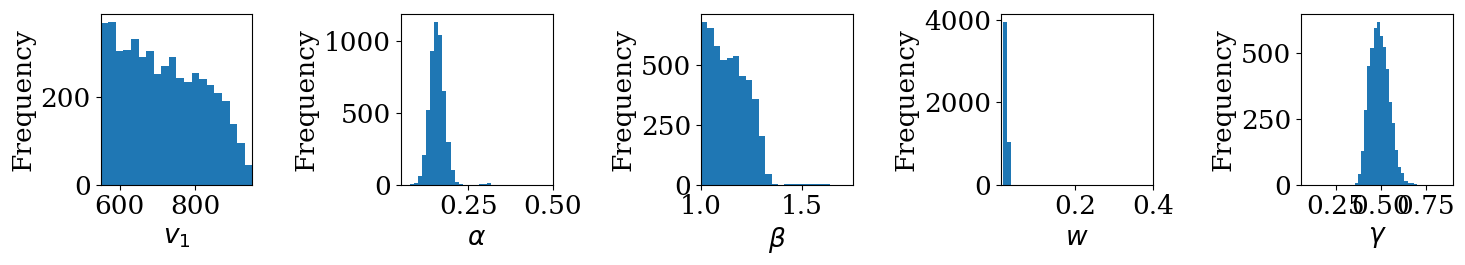

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(15, 3))
for ii in range(5):
    ax[ii].hist(samples_flatten[chosen_samples, ii], bins=20)
    ax[ii].set_ylabel("Frequency")
    
ax[0].set_xlabel(r"$v_{1}$")
ax[1].set_xlabel(r"$\alpha$")
ax[2].set_xlabel(r"$\beta$")
ax[3].set_xlabel(r"$w$")
ax[4].set_xlabel(r"$\gamma$")
ax[0].set_xlim(550, 950)
ax[1].set_xlim(0.05, 0.5)
ax[2].set_xlim(1, 1.75)
ax[3].set_xlim(0.01, 0.4)
ax[4].set_xlim(0.06, 0.9)

plt.tight_layout()

# Get ACE and GONG data

In [16]:
# set up carrington rotation
start_time = carrington_rotation_time(int(CR)).to_datetime()
end_time = carrington_rotation_time(int(CR)+1).to_datetime()

# get ace data
ACE_longitude, ACE_latitude, ACE_r, ACE_vr, ACE_obstime = get_ace_date(start_time=start_time, end_time=end_time)
ACE_vr_is_nan = np.isnan(ACE_vr)

In [11]:
for ii, idx in enumerate(chosen_samples):  
    if ii > 0:
        print("currently running simulation #", ii)
        # the parameters are stored as a vector of values, so unpack them
        v1, alpha, beta, w, gamma = samples_flatten[idx, :]
        # full list of parameters used in the chain of models, the last four are non-influential.
        coefficients_vec = [2.5, 250, v1, alpha, beta, w, gamma, 1.75, 3, 0.15, 50]
        # run model
        run_chain_of_models_mcmc_without_pfss(ACE_longitude=ACE_longitude,
                                              ACE_latitude=ACE_latitude,
                                              ACE_r=ACE_r,
                                              coefficients_vec=coefficients_vec,
                                              cr=CR,
                                              dir_name=dir_name, 
                                              ii=ii)

currently running simulation # 1
currently running simulation # 2
currently running simulation # 3
currently running simulation # 4
currently running simulation # 5
currently running simulation # 6
currently running simulation # 7
currently running simulation # 8
currently running simulation # 9
currently running simulation # 10
currently running simulation # 11
currently running simulation # 12
currently running simulation # 13
currently running simulation # 14
currently running simulation # 15
currently running simulation # 16
currently running simulation # 17
currently running simulation # 18
currently running simulation # 19
currently running simulation # 20
currently running simulation # 21
currently running simulation # 22
currently running simulation # 23
currently running simulation # 24
currently running simulation # 25
currently running simulation # 26
currently running simulation # 27
currently running simulation # 28
currently running simulation # 29
currently running simul

currently running simulation # 239
currently running simulation # 240
currently running simulation # 241
currently running simulation # 242
currently running simulation # 243
currently running simulation # 244
currently running simulation # 245
currently running simulation # 246
currently running simulation # 247
currently running simulation # 248
currently running simulation # 249
currently running simulation # 250
currently running simulation # 251
currently running simulation # 252
currently running simulation # 253
currently running simulation # 254
currently running simulation # 255
currently running simulation # 256
currently running simulation # 257
currently running simulation # 258
currently running simulation # 259
currently running simulation # 260
currently running simulation # 261
currently running simulation # 262
currently running simulation # 263
currently running simulation # 264
currently running simulation # 265
currently running simulation # 266
currently running si

currently running simulation # 474
currently running simulation # 475
currently running simulation # 476
currently running simulation # 477
currently running simulation # 478
currently running simulation # 479
currently running simulation # 480
currently running simulation # 481
currently running simulation # 482
currently running simulation # 483
currently running simulation # 484
currently running simulation # 485
currently running simulation # 486
currently running simulation # 487
currently running simulation # 488
currently running simulation # 489
currently running simulation # 490
currently running simulation # 491
currently running simulation # 492
currently running simulation # 493
currently running simulation # 494
currently running simulation # 495
currently running simulation # 496
currently running simulation # 497
currently running simulation # 498
currently running simulation # 499
currently running simulation # 500
currently running simulation # 501
currently running si

currently running simulation # 709
currently running simulation # 710
currently running simulation # 711
currently running simulation # 712
currently running simulation # 713
currently running simulation # 714
currently running simulation # 715
currently running simulation # 716
currently running simulation # 717
currently running simulation # 718
currently running simulation # 719
currently running simulation # 720
currently running simulation # 721
currently running simulation # 722
currently running simulation # 723
currently running simulation # 724
currently running simulation # 725
currently running simulation # 726
currently running simulation # 727
currently running simulation # 728
currently running simulation # 729
currently running simulation # 730
currently running simulation # 731
currently running simulation # 732
currently running simulation # 733
currently running simulation # 734
currently running simulation # 735
currently running simulation # 736
currently running si

currently running simulation # 944
currently running simulation # 945
currently running simulation # 946
currently running simulation # 947
currently running simulation # 948
currently running simulation # 949
currently running simulation # 950
currently running simulation # 951
currently running simulation # 952
currently running simulation # 953
currently running simulation # 954
currently running simulation # 955
currently running simulation # 956
currently running simulation # 957
currently running simulation # 958
currently running simulation # 959
currently running simulation # 960
currently running simulation # 961
currently running simulation # 962
currently running simulation # 963
currently running simulation # 964
currently running simulation # 965
currently running simulation # 966
currently running simulation # 967
currently running simulation # 968
currently running simulation # 969
currently running simulation # 970
currently running simulation # 971
currently running si

currently running simulation # 1174
currently running simulation # 1175
currently running simulation # 1176
currently running simulation # 1177
currently running simulation # 1178
currently running simulation # 1179
currently running simulation # 1180
currently running simulation # 1181
currently running simulation # 1182
currently running simulation # 1183
currently running simulation # 1184
currently running simulation # 1185
currently running simulation # 1186
currently running simulation # 1187
currently running simulation # 1188
currently running simulation # 1189
currently running simulation # 1190
currently running simulation # 1191
currently running simulation # 1192
currently running simulation # 1193
currently running simulation # 1194
currently running simulation # 1195
currently running simulation # 1196
currently running simulation # 1197
currently running simulation # 1198
currently running simulation # 1199
currently running simulation # 1200
currently running simulation

currently running simulation # 1402
currently running simulation # 1403
currently running simulation # 1404
currently running simulation # 1405
currently running simulation # 1406
currently running simulation # 1407
currently running simulation # 1408
currently running simulation # 1409
currently running simulation # 1410
currently running simulation # 1411
currently running simulation # 1412
currently running simulation # 1413
currently running simulation # 1414
currently running simulation # 1415
currently running simulation # 1416
currently running simulation # 1417
currently running simulation # 1418
currently running simulation # 1419
currently running simulation # 1420
currently running simulation # 1421
currently running simulation # 1422
currently running simulation # 1423
currently running simulation # 1424
currently running simulation # 1425
currently running simulation # 1426
currently running simulation # 1427
currently running simulation # 1428
currently running simulation

currently running simulation # 1630
currently running simulation # 1631
currently running simulation # 1632
currently running simulation # 1633
currently running simulation # 1634
currently running simulation # 1635
currently running simulation # 1636
currently running simulation # 1637
currently running simulation # 1638
currently running simulation # 1639
currently running simulation # 1640
currently running simulation # 1641
currently running simulation # 1642
currently running simulation # 1643
currently running simulation # 1644
currently running simulation # 1645
currently running simulation # 1646
currently running simulation # 1647
currently running simulation # 1648
currently running simulation # 1649
currently running simulation # 1650
currently running simulation # 1651
currently running simulation # 1652
currently running simulation # 1653
currently running simulation # 1654
currently running simulation # 1655
currently running simulation # 1656
currently running simulation

currently running simulation # 1858
currently running simulation # 1859
currently running simulation # 1860
currently running simulation # 1861
currently running simulation # 1862
currently running simulation # 1863
currently running simulation # 1864
currently running simulation # 1865
currently running simulation # 1866
currently running simulation # 1867
currently running simulation # 1868
currently running simulation # 1869
currently running simulation # 1870
currently running simulation # 1871
currently running simulation # 1872
currently running simulation # 1873
currently running simulation # 1874
currently running simulation # 1875
currently running simulation # 1876
currently running simulation # 1877
currently running simulation # 1878
currently running simulation # 1879
currently running simulation # 1880
currently running simulation # 1881
currently running simulation # 1882
currently running simulation # 1883
currently running simulation # 1884
currently running simulation

currently running simulation # 2086
currently running simulation # 2087
currently running simulation # 2088
currently running simulation # 2089
currently running simulation # 2090
currently running simulation # 2091
currently running simulation # 2092
currently running simulation # 2093
currently running simulation # 2094
currently running simulation # 2095
currently running simulation # 2096
currently running simulation # 2097
currently running simulation # 2098
currently running simulation # 2099
currently running simulation # 2100
currently running simulation # 2101
currently running simulation # 2102
currently running simulation # 2103
currently running simulation # 2104
currently running simulation # 2105
currently running simulation # 2106
currently running simulation # 2107
currently running simulation # 2108
currently running simulation # 2109
currently running simulation # 2110
currently running simulation # 2111
currently running simulation # 2112
currently running simulation

currently running simulation # 2314
currently running simulation # 2315
currently running simulation # 2316
currently running simulation # 2317
currently running simulation # 2318
currently running simulation # 2319
currently running simulation # 2320
currently running simulation # 2321
currently running simulation # 2322
currently running simulation # 2323
currently running simulation # 2324
currently running simulation # 2325
currently running simulation # 2326
currently running simulation # 2327
currently running simulation # 2328
currently running simulation # 2329
currently running simulation # 2330
currently running simulation # 2331
currently running simulation # 2332
currently running simulation # 2333
currently running simulation # 2334
currently running simulation # 2335
currently running simulation # 2336
currently running simulation # 2337
currently running simulation # 2338
currently running simulation # 2339
currently running simulation # 2340
currently running simulation

currently running simulation # 2542
currently running simulation # 2543
currently running simulation # 2544
currently running simulation # 2545
currently running simulation # 2546
currently running simulation # 2547
currently running simulation # 2548
currently running simulation # 2549
currently running simulation # 2550
currently running simulation # 2551
currently running simulation # 2552
currently running simulation # 2553
currently running simulation # 2554
currently running simulation # 2555
currently running simulation # 2556
currently running simulation # 2557
currently running simulation # 2558
currently running simulation # 2559
currently running simulation # 2560
currently running simulation # 2561
currently running simulation # 2562
currently running simulation # 2563
currently running simulation # 2564
currently running simulation # 2565
currently running simulation # 2566
currently running simulation # 2567
currently running simulation # 2568
currently running simulation

currently running simulation # 2770
currently running simulation # 2771
currently running simulation # 2772
currently running simulation # 2773
currently running simulation # 2774
currently running simulation # 2775
currently running simulation # 2776
currently running simulation # 2777
currently running simulation # 2778
currently running simulation # 2779
currently running simulation # 2780
currently running simulation # 2781
currently running simulation # 2782
currently running simulation # 2783
currently running simulation # 2784
currently running simulation # 2785
currently running simulation # 2786
currently running simulation # 2787
currently running simulation # 2788
currently running simulation # 2789
currently running simulation # 2790
currently running simulation # 2791
currently running simulation # 2792
currently running simulation # 2793
currently running simulation # 2794
currently running simulation # 2795
currently running simulation # 2796
currently running simulation

currently running simulation # 2998
currently running simulation # 2999
currently running simulation # 3000
currently running simulation # 3001
currently running simulation # 3002
currently running simulation # 3003
currently running simulation # 3004
currently running simulation # 3005
currently running simulation # 3006
currently running simulation # 3007
currently running simulation # 3008
currently running simulation # 3009
currently running simulation # 3010
currently running simulation # 3011
currently running simulation # 3012
currently running simulation # 3013
currently running simulation # 3014
currently running simulation # 3015
currently running simulation # 3016
currently running simulation # 3017
currently running simulation # 3018
currently running simulation # 3019
currently running simulation # 3020
currently running simulation # 3021
currently running simulation # 3022
currently running simulation # 3023
currently running simulation # 3024
currently running simulation

currently running simulation # 3226
currently running simulation # 3227
currently running simulation # 3228
currently running simulation # 3229
currently running simulation # 3230
currently running simulation # 3231
currently running simulation # 3232
currently running simulation # 3233
currently running simulation # 3234
currently running simulation # 3235
currently running simulation # 3236
currently running simulation # 3237
currently running simulation # 3238
currently running simulation # 3239
currently running simulation # 3240
currently running simulation # 3241
currently running simulation # 3242
currently running simulation # 3243
currently running simulation # 3244
currently running simulation # 3245
currently running simulation # 3246
currently running simulation # 3247
currently running simulation # 3248
currently running simulation # 3249
currently running simulation # 3250
currently running simulation # 3251
currently running simulation # 3252
currently running simulation

currently running simulation # 3454
currently running simulation # 3455
currently running simulation # 3456
currently running simulation # 3457
currently running simulation # 3458
currently running simulation # 3459
currently running simulation # 3460
currently running simulation # 3461
currently running simulation # 3462
currently running simulation # 3463
currently running simulation # 3464
currently running simulation # 3465
currently running simulation # 3466
currently running simulation # 3467
currently running simulation # 3468
currently running simulation # 3469
currently running simulation # 3470
currently running simulation # 3471
currently running simulation # 3472
currently running simulation # 3473
currently running simulation # 3474
currently running simulation # 3475
currently running simulation # 3476
currently running simulation # 3477
currently running simulation # 3478
currently running simulation # 3479
currently running simulation # 3480
currently running simulation

currently running simulation # 3682
currently running simulation # 3683
currently running simulation # 3684
currently running simulation # 3685
currently running simulation # 3686
currently running simulation # 3687
currently running simulation # 3688
currently running simulation # 3689
currently running simulation # 3690
currently running simulation # 3691
currently running simulation # 3692
currently running simulation # 3693
currently running simulation # 3694
currently running simulation # 3695
currently running simulation # 3696
currently running simulation # 3697
currently running simulation # 3698
currently running simulation # 3699
currently running simulation # 3700
currently running simulation # 3701
currently running simulation # 3702
currently running simulation # 3703
currently running simulation # 3704
currently running simulation # 3705
currently running simulation # 3706
currently running simulation # 3707
currently running simulation # 3708
currently running simulation

currently running simulation # 3910
currently running simulation # 3911
currently running simulation # 3912
currently running simulation # 3913
currently running simulation # 3914
currently running simulation # 3915
currently running simulation # 3916
currently running simulation # 3917
currently running simulation # 3918
currently running simulation # 3919
currently running simulation # 3920
currently running simulation # 3921
currently running simulation # 3922
currently running simulation # 3923
currently running simulation # 3924
currently running simulation # 3925
currently running simulation # 3926
currently running simulation # 3927
currently running simulation # 3928
currently running simulation # 3929
currently running simulation # 3930
currently running simulation # 3931
currently running simulation # 3932
currently running simulation # 3933
currently running simulation # 3934
currently running simulation # 3935
currently running simulation # 3936
currently running simulation

currently running simulation # 4138
currently running simulation # 4139
currently running simulation # 4140
currently running simulation # 4141
currently running simulation # 4142
currently running simulation # 4143
currently running simulation # 4144
currently running simulation # 4145
currently running simulation # 4146
currently running simulation # 4147
currently running simulation # 4148
currently running simulation # 4149
currently running simulation # 4150
currently running simulation # 4151
currently running simulation # 4152
currently running simulation # 4153
currently running simulation # 4154
currently running simulation # 4155
currently running simulation # 4156
currently running simulation # 4157
currently running simulation # 4158
currently running simulation # 4159
currently running simulation # 4160
currently running simulation # 4161
currently running simulation # 4162
currently running simulation # 4163
currently running simulation # 4164
currently running simulation

currently running simulation # 4366
currently running simulation # 4367
currently running simulation # 4368
currently running simulation # 4369
currently running simulation # 4370
currently running simulation # 4371
currently running simulation # 4372
currently running simulation # 4373
currently running simulation # 4374
currently running simulation # 4375
currently running simulation # 4376
currently running simulation # 4377
currently running simulation # 4378
currently running simulation # 4379
currently running simulation # 4380
currently running simulation # 4381
currently running simulation # 4382
currently running simulation # 4383
currently running simulation # 4384
currently running simulation # 4385
currently running simulation # 4386
currently running simulation # 4387
currently running simulation # 4388
currently running simulation # 4389
currently running simulation # 4390
currently running simulation # 4391
currently running simulation # 4392
currently running simulation

currently running simulation # 4594
currently running simulation # 4595
currently running simulation # 4596
currently running simulation # 4597
currently running simulation # 4598
currently running simulation # 4599
currently running simulation # 4600
currently running simulation # 4601
currently running simulation # 4602
currently running simulation # 4603
currently running simulation # 4604
currently running simulation # 4605
currently running simulation # 4606
currently running simulation # 4607
currently running simulation # 4608
currently running simulation # 4609
currently running simulation # 4610
currently running simulation # 4611
currently running simulation # 4612
currently running simulation # 4613
currently running simulation # 4614
currently running simulation # 4615
currently running simulation # 4616
currently running simulation # 4617
currently running simulation # 4618
currently running simulation # 4619
currently running simulation # 4620
currently running simulation

currently running simulation # 4822
currently running simulation # 4823
currently running simulation # 4824
currently running simulation # 4825
currently running simulation # 4826
currently running simulation # 4827
currently running simulation # 4828
currently running simulation # 4829
currently running simulation # 4830
currently running simulation # 4831
currently running simulation # 4832
currently running simulation # 4833
currently running simulation # 4834
currently running simulation # 4835
currently running simulation # 4836
currently running simulation # 4837
currently running simulation # 4838
currently running simulation # 4839
currently running simulation # 4840
currently running simulation # 4841
currently running simulation # 4842
currently running simulation # 4843
currently running simulation # 4844
currently running simulation # 4845
currently running simulation # 4846
currently running simulation # 4847
currently running simulation # 4848
currently running simulation

# Ensemble Prediction

In [44]:
Y = np.zeros((len(ACE_longitude), n_ensemble))
RMSE = np.zeros(n_ensemble)
PCC = np.zeros(n_ensemble)

In [45]:
for ii in range(1, n_ensemble):
    Y[:, ii] = np.load(dir_name + "ensemble" + str(ii) + ".npy") 
    RMSE[ii] = np.sqrt(np.mean((Y[:, ii][~ACE_vr_is_nan] - ACE_vr.to(u.km / u.s).value[~ACE_vr_is_nan]) ** 2))
    PCC[ii] = pearsonr(Y[:, ii][~ACE_vr_is_nan], ACE_vr.to(u.km / u.s).value[~ACE_vr_is_nan])[0]

In [46]:
Y_plus_error = Y + np.random.normal(loc=0.0, scale=80, size=np.shape(Y))

In [47]:
median = np.median(Y, axis=1)
pl95, pu95 = np.quantile(Y_plus_error, q=[0.025, 0.975], axis=1)
pl50, pu50 = np.quantile(Y_plus_error, q=[0.25, 0.75], axis=1)

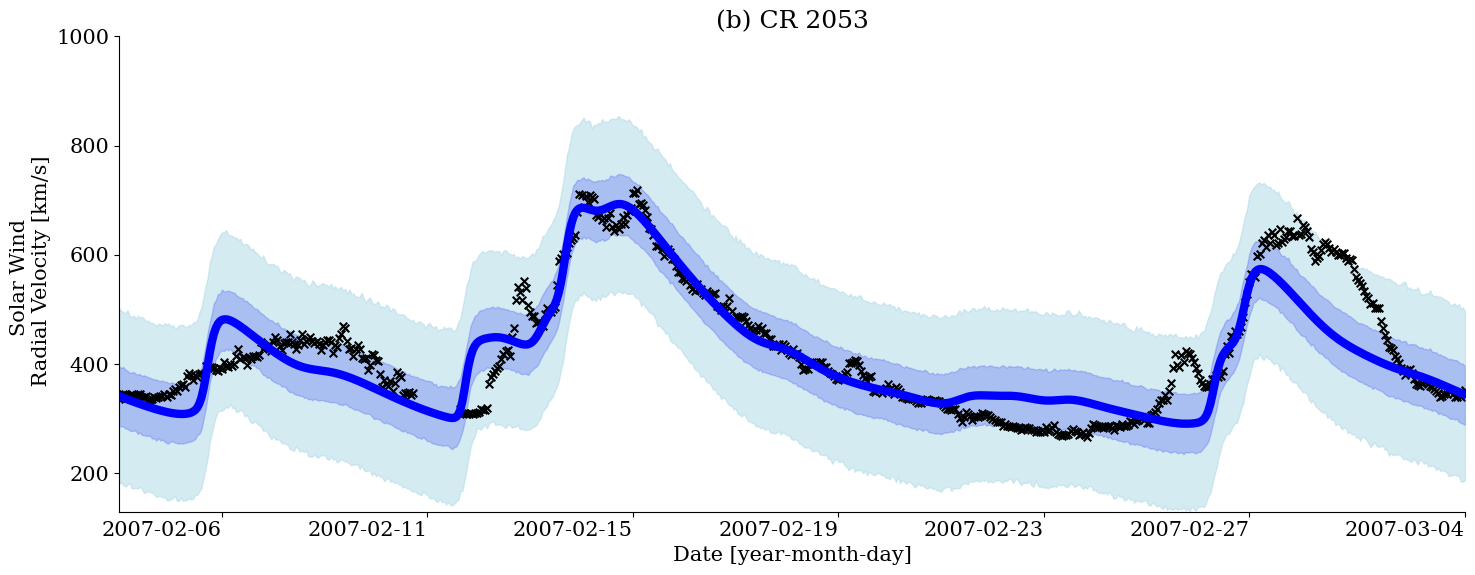

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))

time = np.asarray(ACE_obstime.value, dtype='datetime64[s]')

ax.plot(time, median, c="blue", linewidth=6, label="ensemble median")

ax.fill_between(time, pl50, pu50, 
                color='blue', alpha=.35, label=r"50% predictive interval")

ax.fill_between(time, pl95, pu95, 
                color='lightblue', alpha=.5, label=r"95% predictive interval")

ax.scatter(time, ACE_vr, marker="x", s=30, c="black",label="ACE Observations")

ax.set_ylim(130, 900)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.autofmt_xdate(rotation=0)
ax.set_xticks([time[50], time[150], time[250], time[350], time[450], time[550], time[-1]])
ax.set_yticks([200, 400, 600, 800, 1000])
ax.fmt_xdata = matplotlib.dates.DateFormatter('%Y-%m-%d')
ax.set_xlabel("Date [year-month-day]")
ax.set_ylabel("Solar Wind \n Radial Velocity [km/s]")
ax.set_xlim(time[0], time[-1])
ax.set_title("(b) CR "+ str(CR))
plt.tight_layout()
plt.savefig("figs/MCMC/CR" + str(CR) + "_ensemble.png", dpi=600)

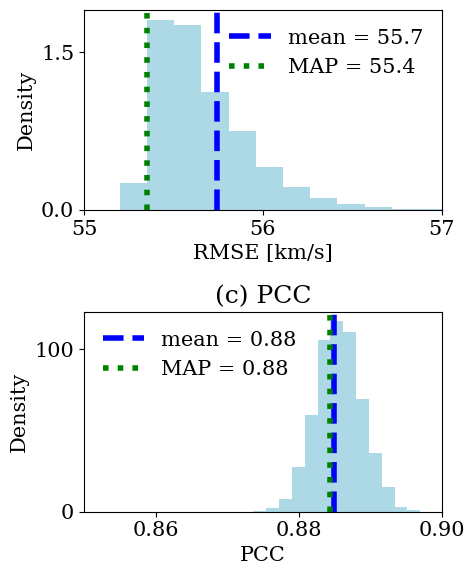

In [69]:
fig, ax = plt.subplots(nrows=2, figsize=(5, 6))

mu_rmse = np.mean(RMSE)

n , bins, _ = ax[0].hist(RMSE, 500, density=1, color="lightblue")
ax[0].axvline(mu_rmse, linewidth=4, linestyle="--", c='blue', label="mean = "+ str(round(mu_rmse, 1)))
MAP = bins[np.where(n == n.max())]
ax[0].axvline(MAP, linewidth=4, linestyle=":", c='green', label="MAP = "+ str(round(MAP[0], 1)))
_ = ax[0].set_xlim(55, 57)
_ = ax[0].set_ylabel("Density")
_ = ax[0].set_yticks([0,  1.5])
_ = ax[0].set_xlabel("RMSE [km/s]")
_ = ax[0].set_xticks([55, 56, 57])
legend = ax[0].legend()
legend.get_frame().set_alpha(0)

mu_pcc = np.mean(PCC)

n , bins, _ = ax[1].hist(PCC, 500, density=1, color="lightblue")
ax[1].axvline(mu_pcc, linewidth=4, linestyle="--", c='blue', label="mean = "+ str(round(mu_pcc, 2)))
MAP = bins[np.where(n == n.max())]
ax[1].axvline(MAP, linewidth=4, linestyle=":", c='green', label="MAP = "+ str(round(MAP[0], 2)))
_ = ax[1].set_title("(c) PCC")
_ = ax[1].set_xlim(0.85, 0.9)
_ = ax[1].set_ylabel("Density")
_ = ax[1].set_xlabel("PCC")
_ = ax[1].set_yticks([0, 100])
legend = ax[1].legend(loc="upper left")
legend.get_frame().set_alpha(0)

plt.tight_layout()
plt.savefig("figs/MCMC/CR" + str(CR) + "_rmse_pcc.png", dpi=600)

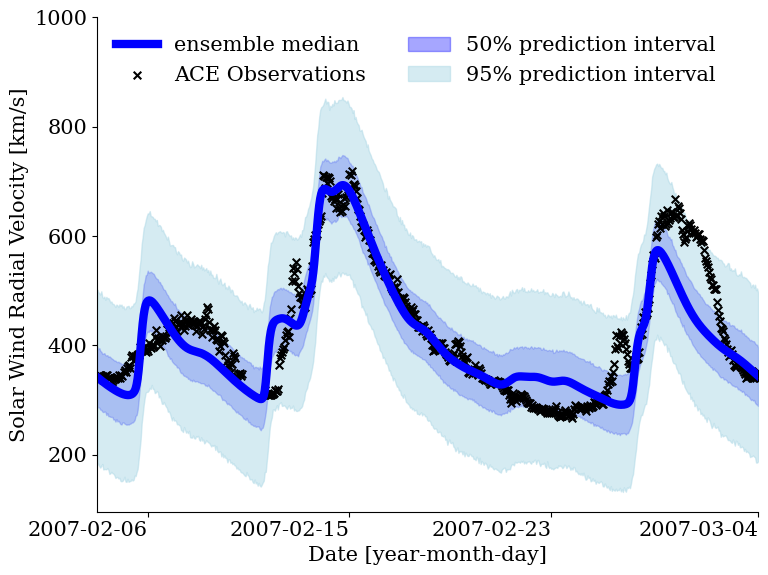

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

time = np.asarray(ACE_obstime.value, dtype='datetime64[s]')

ax.plot(time, median, c="blue", linewidth=6, label="ensemble median")

ax.scatter(np.nan, np.nan, marker="x", s=30, c="black",label="ACE Observations")

ax.fill_between(time, pl50, pu50, 
                color='blue', alpha=.35, label=r"50% prediction interval")

ax.fill_between(time, pl95, pu95, 
                color='lightblue', alpha=.5, label=r"95% prediction interval")

ax.scatter(time, ACE_vr, marker="x", s=30, c="black")

# for ii in range(n_ensemble):
#     ax.plot(time,Y[:, ii], c="green", alpha=0.1)
# ax.plot(np.nan, np.nan, c="green", alpha=0.1, label="ensemble")
legend = ax.legend(ncols=2, loc="upper left")
legend.get_frame().set_alpha(0)
#ax.set_ylim(130, 1000)
ax.set_yticks(np.arange(200, 1200, 200))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.autofmt_xdate(rotation=0)
ax.set_xticks([time[50], time[250], time[450], time[-1]])
ax.fmt_xdata = matplotlib.dates.DateFormatter('%Y-%m-%d')
ax.set_xlabel("Date [year-month-day]")
ax.set_ylabel("Solar Wind Radial Velocity [km/s]")
ax.set_xlim(time[0], time[-1])
plt.tight_layout()
plt.savefig("figs/MCMC/CR" + str(CR) + "_ensemble.png", dpi=600)